In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,15)
import statistics as stat
import numpy as np
import pyodbc

In [2]:
phone = pd.read_csv("mobile_phone.csv")

In [3]:
phone

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,3
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,2
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,3


### Creating Database Connection

In [4]:
#conn = pyodbc.connect(r'Driver=SQL Server; Server= DESKTOP-1B460V0;Database = stroke; Trusted_Connection = yes;')
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=SIR-BOLU\SQLEXPRESS;'
                      'Database=mobile_phone;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()
cursor
conn

In [5]:
conn

In [6]:
data= pd.read_sql_query(''' select * from dbo.mobile_phone''', conn)
data_df = pd.DataFrame(data)

C:\Users\SIR BOLU\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
data_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,False,2.2,False,1,False,7,0.6,188,2,...,20,756,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,...,905,1988,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,...,1263,1716,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,...,1216,1786,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,...,1208,1212,1411,8,2,15,True,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,True,1.9,False,0,True,54,0.5,170,7,...,644,913,2121,14,8,15,True,True,False,3
2996,609,False,1.8,True,0,False,13,0.9,186,4,...,1152,1632,1933,8,1,19,False,True,True,2
2997,1185,False,1.4,False,1,True,8,0.5,80,1,...,477,825,1223,5,0,14,True,False,False,0
2998,1533,True,0.5,True,0,False,50,0.4,171,2,...,38,832,2509,15,11,6,False,True,False,3


In [8]:
data_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,False,2.2,False,1,False,7,0.6,188,2,...,20,756,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,...,905,1988,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,...,1263,1716,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,...,1216,1786,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,...,1208,1212,1411,8,2,15,True,True,False,1


# Exploratory data Analysis using Datasist Library

In [9]:
import datasist as ds

In [10]:
#ds.structdata.describe(data_df)

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   bool   
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   bool   
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   bool   
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   bool   
 18  touch_sc

In [12]:
ds.visualizations.countplot(data_df)

In [13]:
ds.visualizations.countplot(data_df, separate_by='price_range')

In [14]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [15]:
blue=enc.fit_transform(data_df['blue'])

In [16]:
dual_sim=enc.fit_transform(data_df['dual_sim'])

In [17]:
four_g=enc.fit_transform(data_df['four_g'])
three_g=enc.fit_transform(data_df['three_g'])
touch_screen=enc.fit_transform(data_df['touch_screen'])

In [18]:
wifi=enc.fit_transform(data_df['wifi'])

In [19]:
data_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,False,2.2,False,1,False,7,0.6,188,2,...,20,756,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,...,905,1988,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,...,1263,1716,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,...,1216,1786,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,...,1208,1212,1411,8,2,15,True,True,False,1


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   bool   
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   bool   
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   bool   
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   bool   
 18  touch_sc

In [21]:
data_df.dtypes

battery_power      int64
blue                bool
clock_speed      float64
dual_sim            bool
fc                 int64
four_g              bool
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g             bool
touch_screen        bool
wifi                bool
price_range        int64
dtype: object

In [22]:
#correlation matrix
data_df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.007606,-0.005250,-0.048135,0.019819,-0.003877,-0.000998,0.020382,-0.014217,-0.011859,...,0.025628,0.012056,-0.011059,-0.038917,-0.022727,0.040337,0.018081,-0.010421,-0.005728,0.149885
blue,-0.007606,1.000000,0.026114,0.019910,-0.016035,0.007922,0.024133,0.009229,0.001789,0.024396,...,-0.024263,-0.038579,0.036893,0.001691,0.000818,-0.001305,-0.015693,-0.013350,-0.006057,0.023079
clock_speed,-0.005250,0.026114,1.000000,-0.004980,0.003514,-0.037196,-0.005467,-0.003707,0.003424,-0.008339,...,-0.004192,0.017658,0.002130,-0.032997,-0.014421,-0.034143,-0.038021,0.033917,-0.032594,0.001212
dual_sim,-0.048135,0.019910,-0.004980,1.000000,0.000526,0.010192,-0.014199,-0.007585,-0.006660,-0.017750,...,-0.011925,0.014643,0.043486,-0.006008,-0.012221,-0.024706,-0.009127,-0.000096,0.025674,0.009680
fc,0.019819,-0.016035,0.003514,0.000526,1.000000,-0.000779,-0.020176,0.006548,0.021532,-0.002960,...,-0.013234,0.006695,-0.007520,0.007307,-0.007697,-0.021831,-0.002797,-0.004628,-0.007223,0.030507
four_g,-0.003877,0.007922,-0.037196,0.010192,-0.000779,1.000000,-0.008044,0.002775,-0.010920,0.003732,...,-0.001263,0.017664,0.014950,0.013950,0.026152,-0.026627,0.573829,0.007922,-0.023620,0.011529
int_memory,-0.000998,0.024133,-0.005467,-0.014199,-0.020176,-0.008044,1.000000,0.004277,-0.026769,-0.013321,...,0.003081,-0.007357,0.019742,0.020374,0.013828,0.006348,-0.011804,-0.010725,0.008606,0.011998
m_dep,0.020382,0.009229,-0.003707,-0.007585,0.006548,0.002775,0.004277,1.000000,0.000849,-0.000093,...,0.036750,0.026959,-0.000154,-0.026484,-0.021243,0.019500,-0.017879,0.011327,-0.032056,0.010581
mobile_wt,-0.014217,0.001789,0.003424,-0.006660,0.021532,-0.010920,-0.026769,0.000849,1.000000,-0.025144,...,0.004442,-0.004675,0.007720,-0.029531,-0.006372,-0.003097,0.003172,0.005084,0.022733,-0.020176
n_cores,-0.011859,0.024396,-0.008339,-0.017750,-0.002960,0.003732,-0.013321,-0.000093,-0.025144,1.000000,...,-0.021674,-0.003281,-0.011279,-0.010362,0.023479,0.006603,0.007503,0.010416,-0.009054,-0.004663


### Modelling

In [23]:
data_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
X = data_df.drop('price_range', axis =1)
y = data_df.price_range

In [25]:
from sklearn.model_selection import train_test_split
x_train, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model = RandomForestRegressor()
model.fit(x_train,ytrain)

RandomForestRegressor()

In [28]:
predictions = model.predict(xtest)

In [29]:
from sklearn import metrics

In [30]:
import numpy as np
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, predictions)))

RMSE: 0.8724086071204122


In [34]:
import pickle
file = open('random_forest_model.pkl', 'wb')
pickle.dump(model,file)

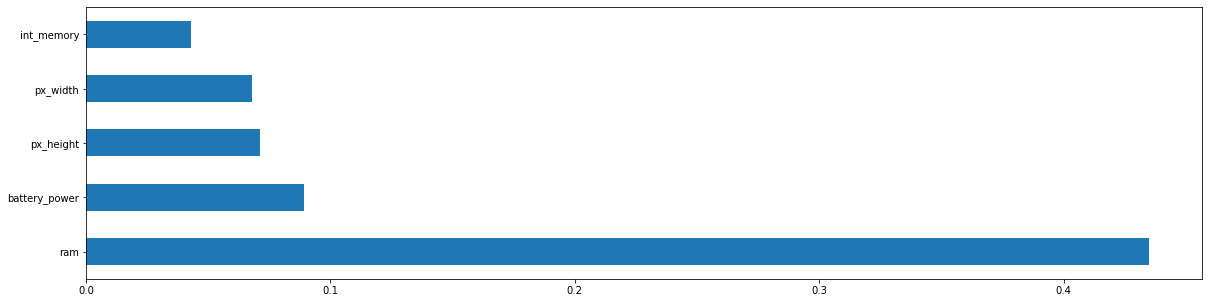

In [32]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feat_importances =pd.Series(model.feature_importances_, index = x_train.columns)
feat_importances.nlargest(5).plot(kind='barh', figsize=(20,5))
plt.show()

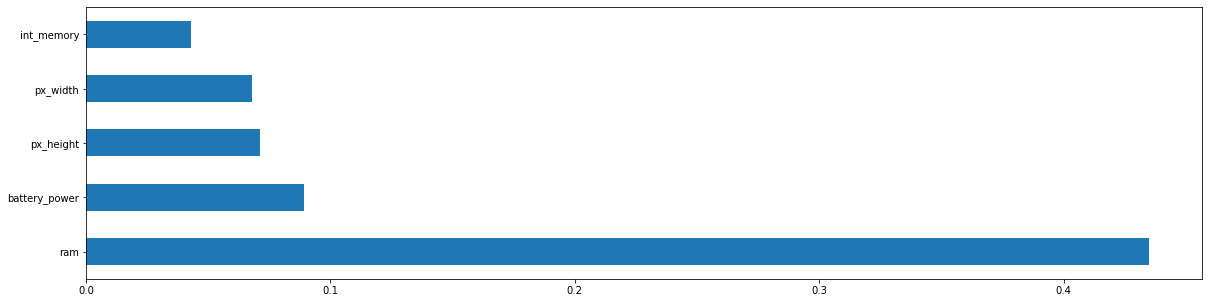

In [33]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feat_importances =pd.Series(model.feature_importances_, index = x_train.columns)
feat_importances.nlargest(5).plot(kind='barh', figsize=(20,5))
plt.show()